In [31]:
import numpy as np
import scipy.stats

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
rv = scipy.stats.uniform()

# Лабораторна робота №5

In [34]:
NG = 51
M = 20
n = int(NG) / 4

N = int(2 ** n)

In [65]:
idx = np.arange(N)

s2 = 2 * rv.rvs(N) + \
     NG * np.cos(2 * M * np.pi * idx / N) * (1 + 0.1 * rv.rvs(N)) + \
     17 * np.cos(4 * M * np.pi * idx / N + rv.rvs(N)) + 3 * np.cos(5 * M * np.pi * idx / N) * (rv.rvs(N) + NG)

A = np.array([2 * np.sum(s2 * np.cos(2 * np.pi * idx / N)) / N 
              for i in range(1, int(N / 2) - 1)]) 

A = np.insert(A, 0, np.sum(s2 * np.cos(0)) / N)
A = np.append(A, np.sum(s2 * np.cos(np.pi * idx)) / N)

B = np.array([
    2 * np.sum(s2 * np.sin(2 * np.pi * idx * i / N)) / N 
    for i in range(int(N/2))
]) 

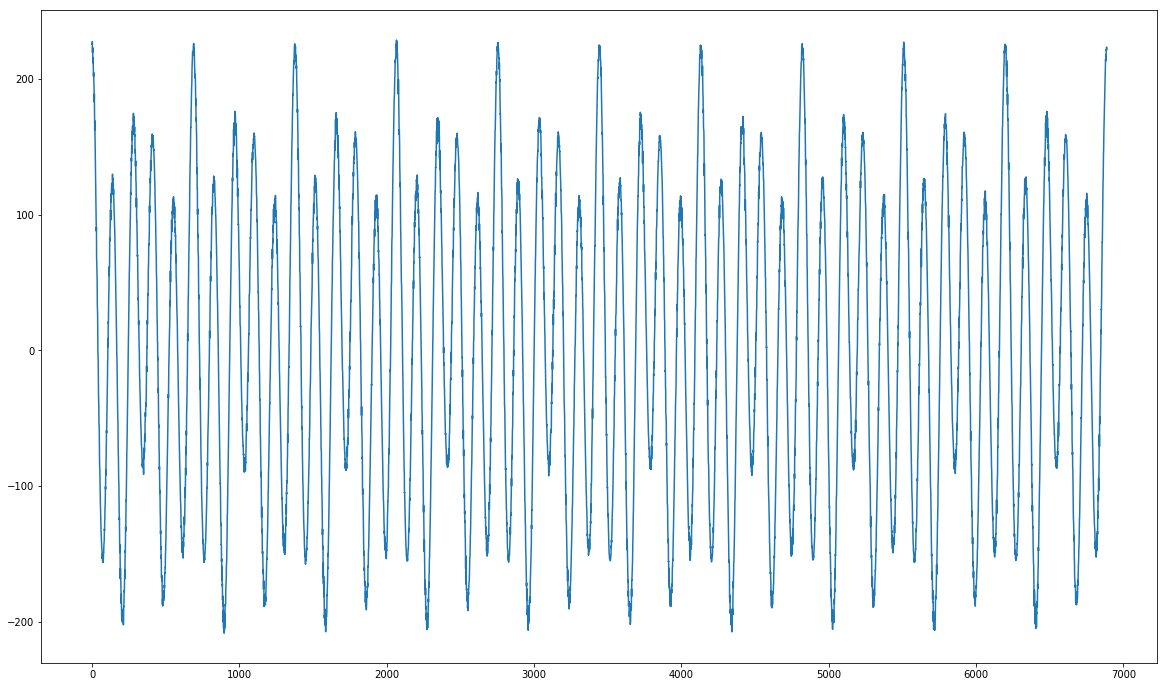

In [66]:
plt.figure(figsize=(20, 12))
plt.plot(s2)

In [67]:
С = np.sqrt(A**2 + B**2)

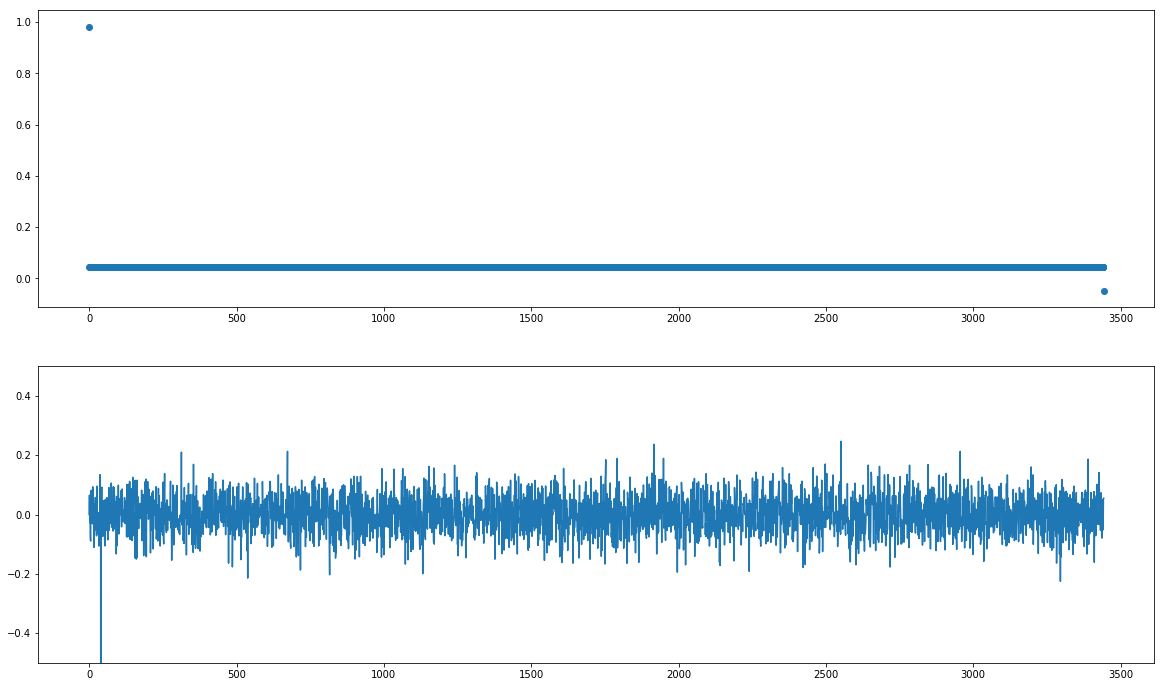

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

ax[0].scatter(np.arange(A.shape[0]), A)

ax[1].set_ylim((-0.5, 0.5))
ax[1].plot(B)

plt.show()

In [69]:
len(A), len(B)

(3444, 3444)

In [70]:
jdx = np.arange(A.shape[0])

dl = np.array([
    np.sum(A * np.cos(2 * np.pi * jdx * i / N)) + np.sum(B * np.sin(2 * np.pi * jdx * i / N))
    for i in range(N)
])

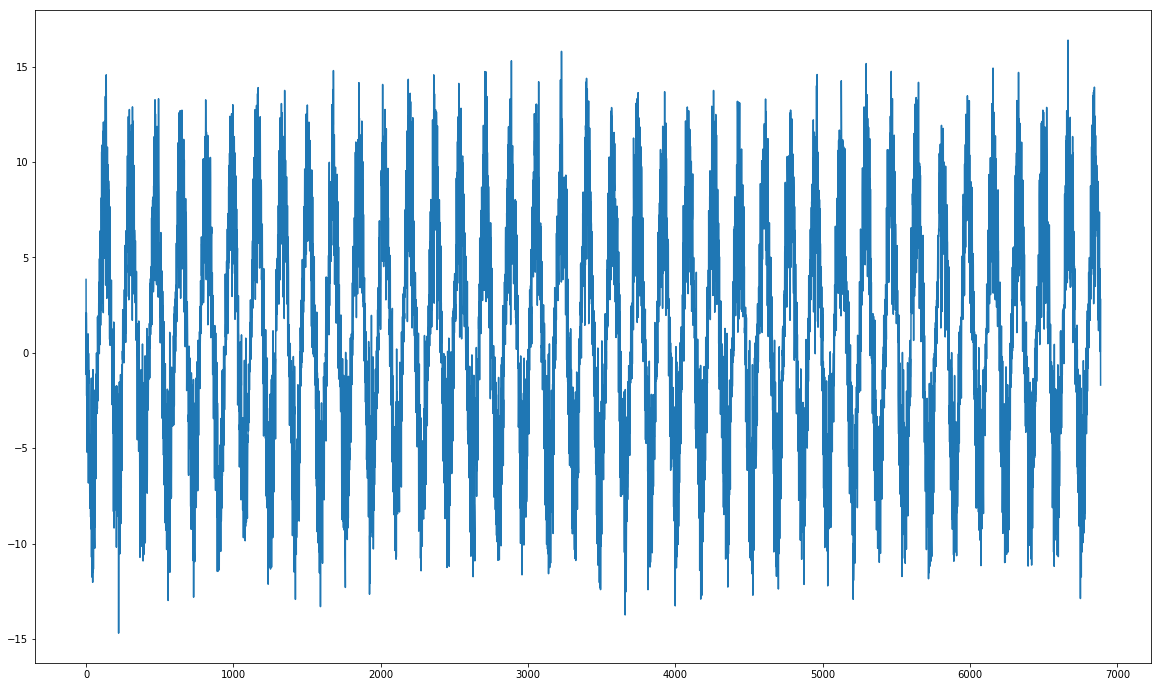

In [71]:
plt.figure(figsize=(20, 12))
plt.plot(dl[1:])

In [72]:
# Ковариационные фукнции
# Матрица ковариации
# спектральная плотность
# при помощи превращения Фурье можно обрезать частоты

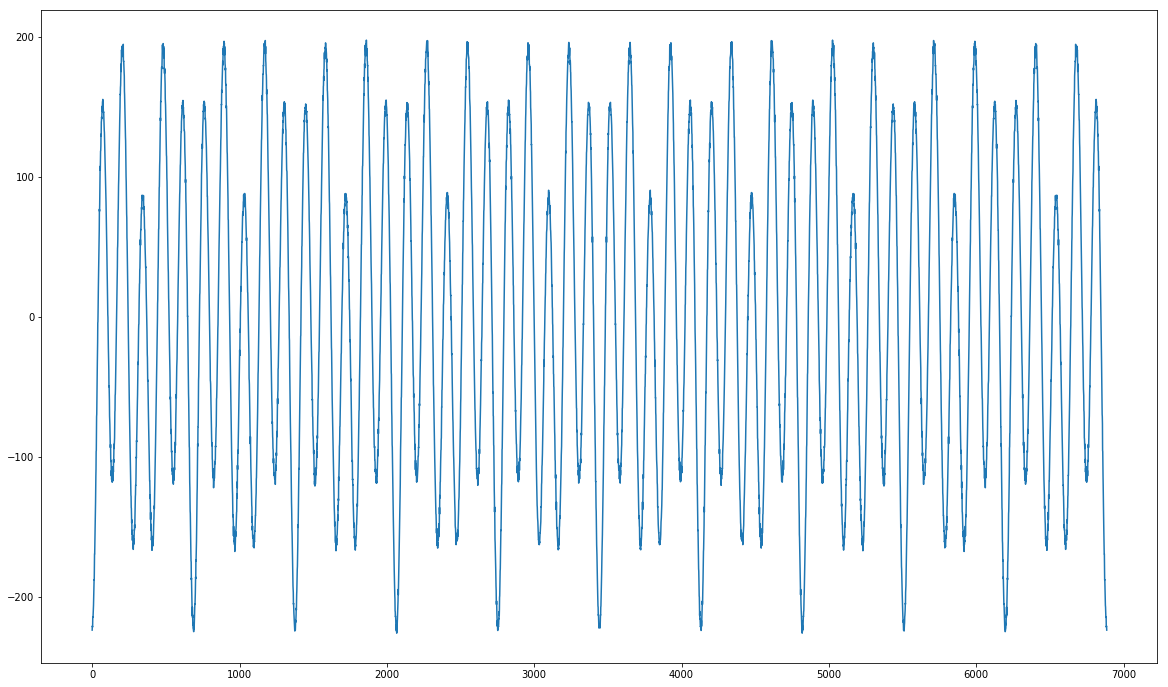

In [73]:
plt.figure(figsize=(20, 12))
plt.plot((dl - s2)[1:])

### Другий варіант

In [13]:
va = 0.42 - 0.5 * np.cos(2 * np.pi * idx / N) + 0.08 * np.cos(4 * np.pi * idx / N)

In [14]:
s1 = s2 * va

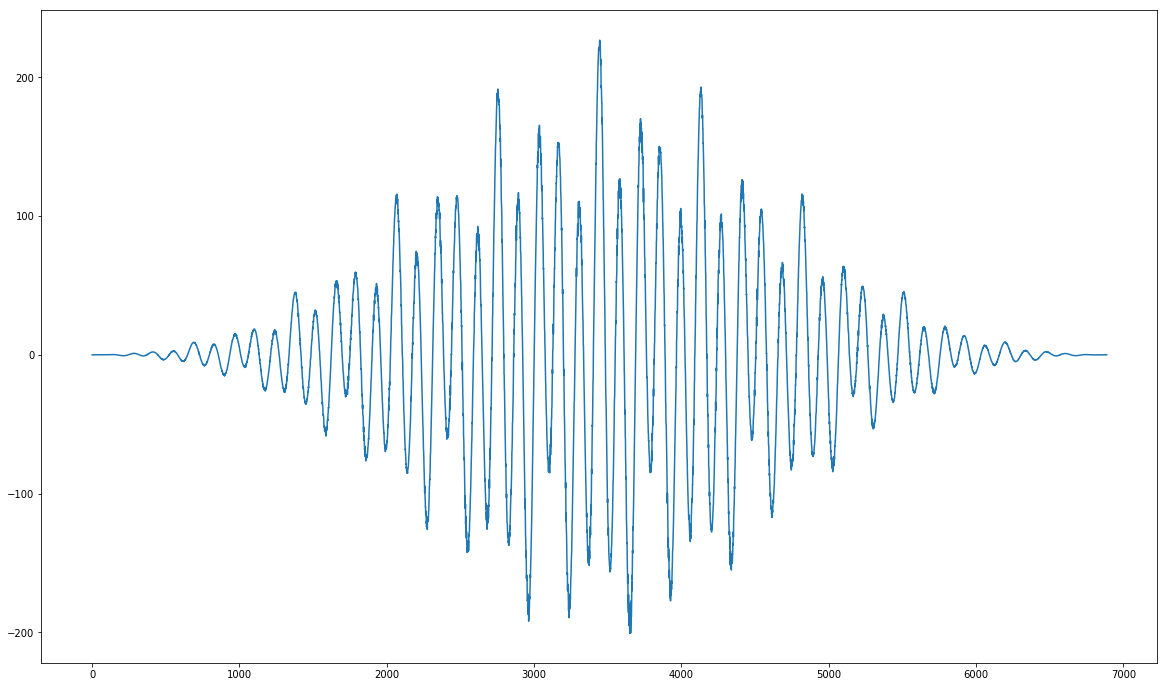

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(s1)

In [16]:
A = np.array([
    2 * np.sum(s1 * np.cos(2 * np.pi * idx / N)) / N 
    for i in range(1, int(N/2))
])

A = np.insert(A, 0, np.sum(s1 * np.cos(0)) / N)
A = np.append(A, np.sum(s1 * np.cos(2 * np.pi * idx / N)) / N)

B = np.array([
    2 * np.sum(s1 * np.sin(2 * np.pi * idx * i / N)) / N 
    for i in range(0, int(N/2) + 1)
]) 

/home/vashanin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5267823928720732, top=-0.5267823928720732
  'bottom=%s, top=%s') % (bottom, top))


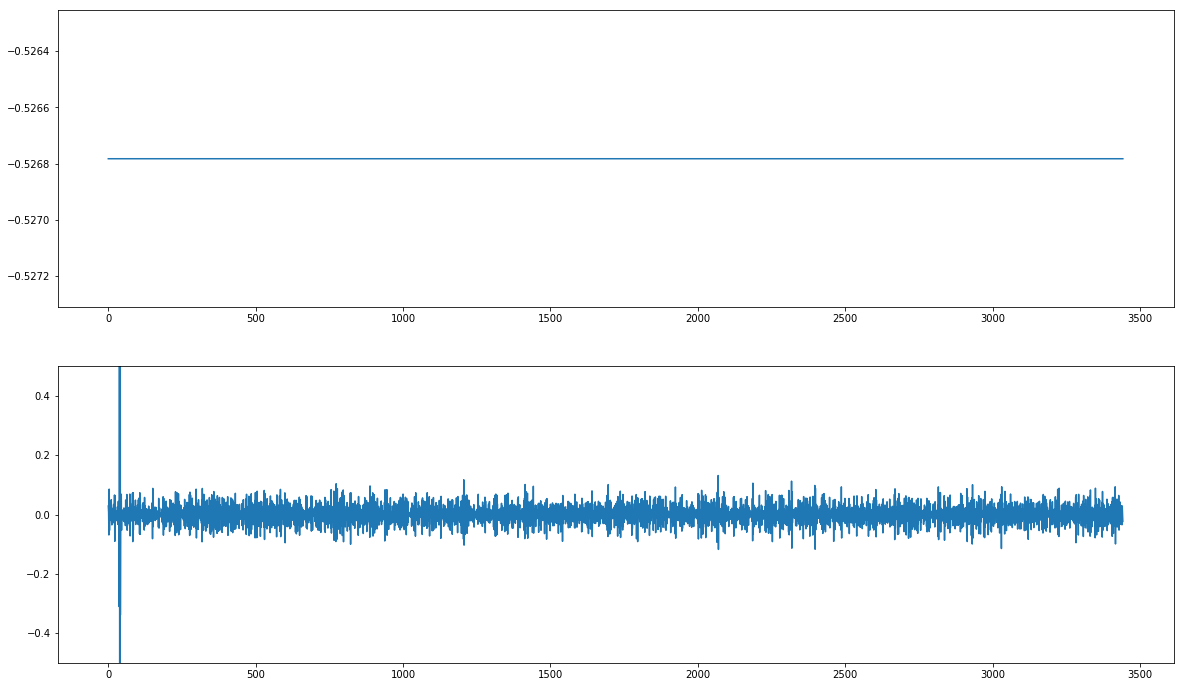

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

ax[0].set_ylim((min(A[1:-1]), max(A[1:-1])))
ax[0].plot(A[1:-1])

ax[1].set_ylim((-0.5, 0.5))
ax[1].plot(B[1:-1])

plt.show()

In [18]:
jdx = np.arange(int(N/2) + 1)

dl = np.array([
    np.sum(A * np.cos(2 * np.pi * jdx * i / N)) + np.sum(B * np.sin(2 * np.pi * jdx * i / N))
    for i in range(N)
])

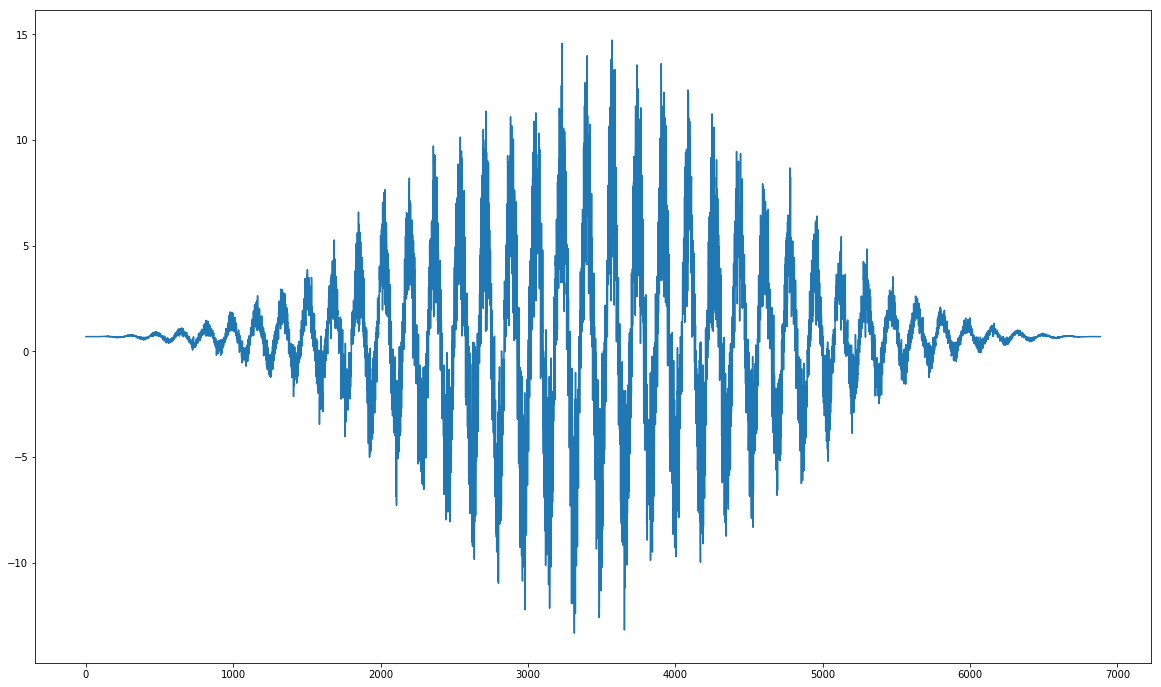

In [19]:
plt.figure(figsize=(20, 12))
plt.plot(dl[1:])

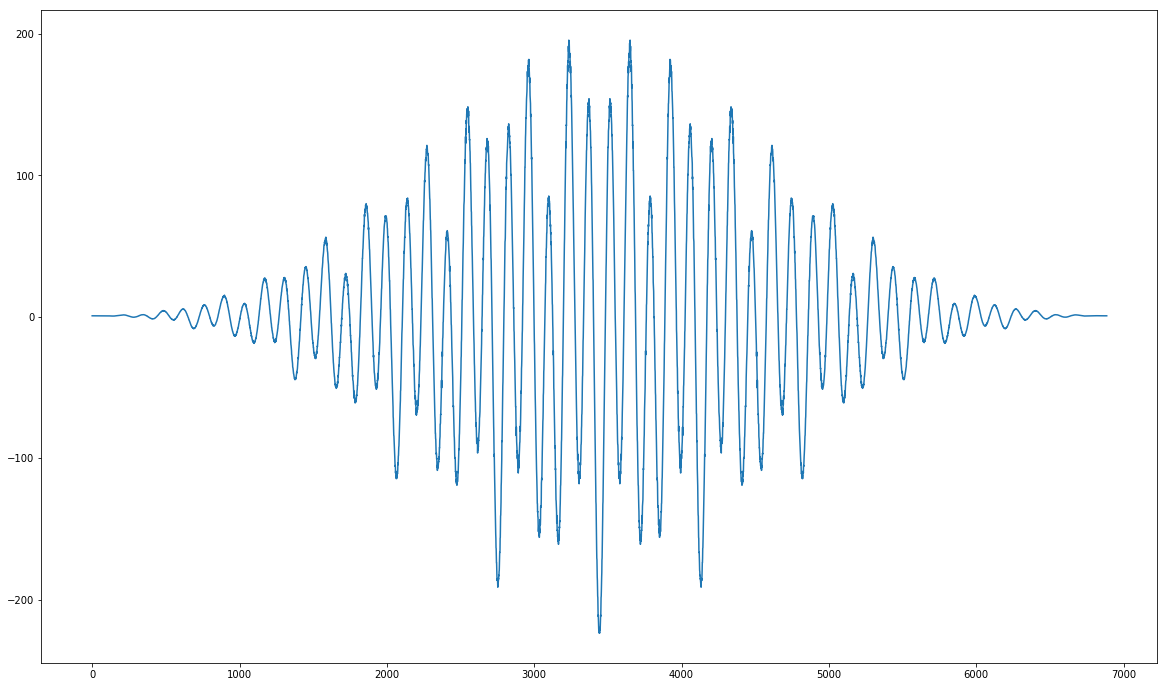

In [20]:
plt.figure(figsize=(20, 12))
plt.plot((dl - s1)[1:])

### Третій варіант

In [21]:
vb = 0.54 - 0.46 * np.cos(2 * np.pi * idx / N)

In [22]:
s1 = s2 * vb

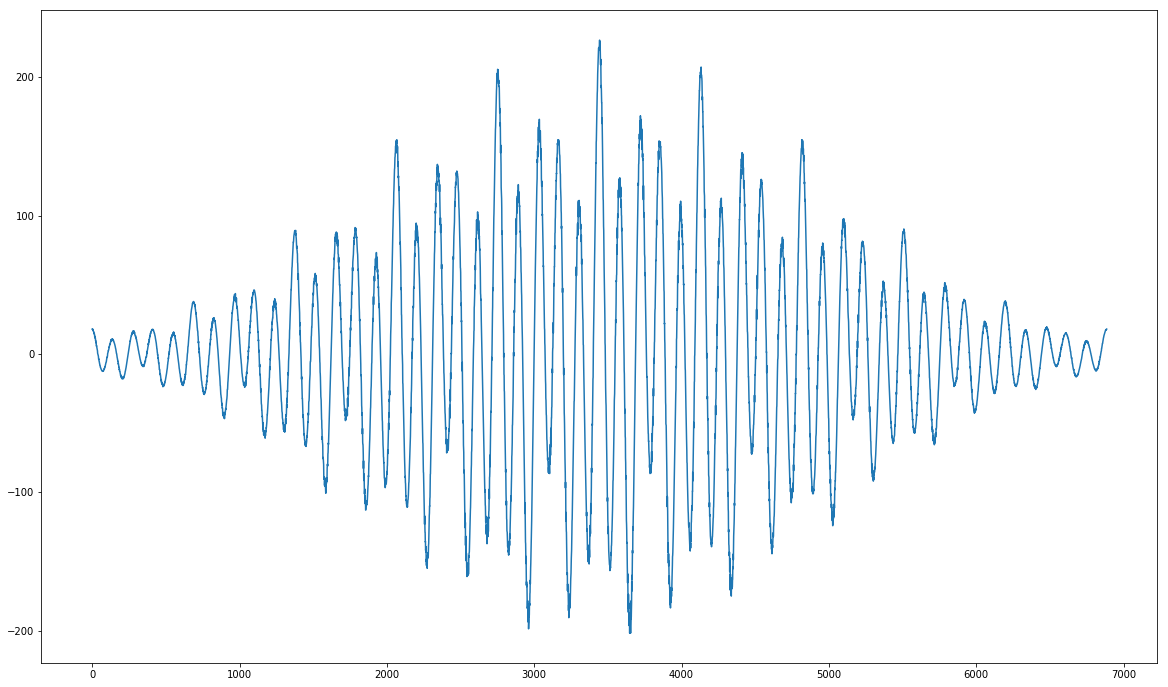

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(s1[1:])

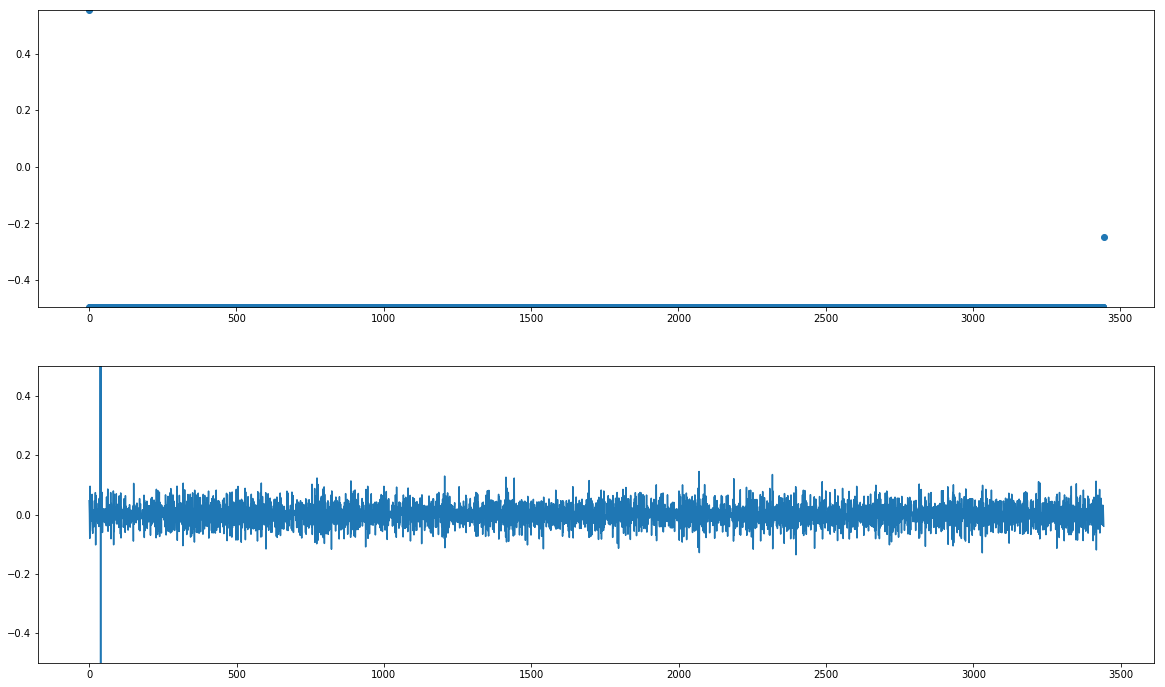

In [24]:
A = np.array([
    2 * np.sum(s1 * np.cos(2 * np.pi * idx / N)) / N 
    for i in range(1, int(N/2))
])

A = np.insert(A, 0, np.sum(s1 * np.cos(0)) / N)
A = np.append(A, np.sum(s1 * np.cos(2 * np.pi * idx / N)) / N)

B = np.array([
    2 * np.sum(s1 * np.sin(2 * np.pi * idx * i / N)) / N 
    for i in range(0, int(N/2) + 1)
]) 

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

ax[0].set_ylim((min(A), max(A)))
ax[0].scatter(np.arange(A.shape[0]), A)

ax[1].set_ylim((-0.5, 0.5))
ax[1].plot(B[1:-1])

plt.show()

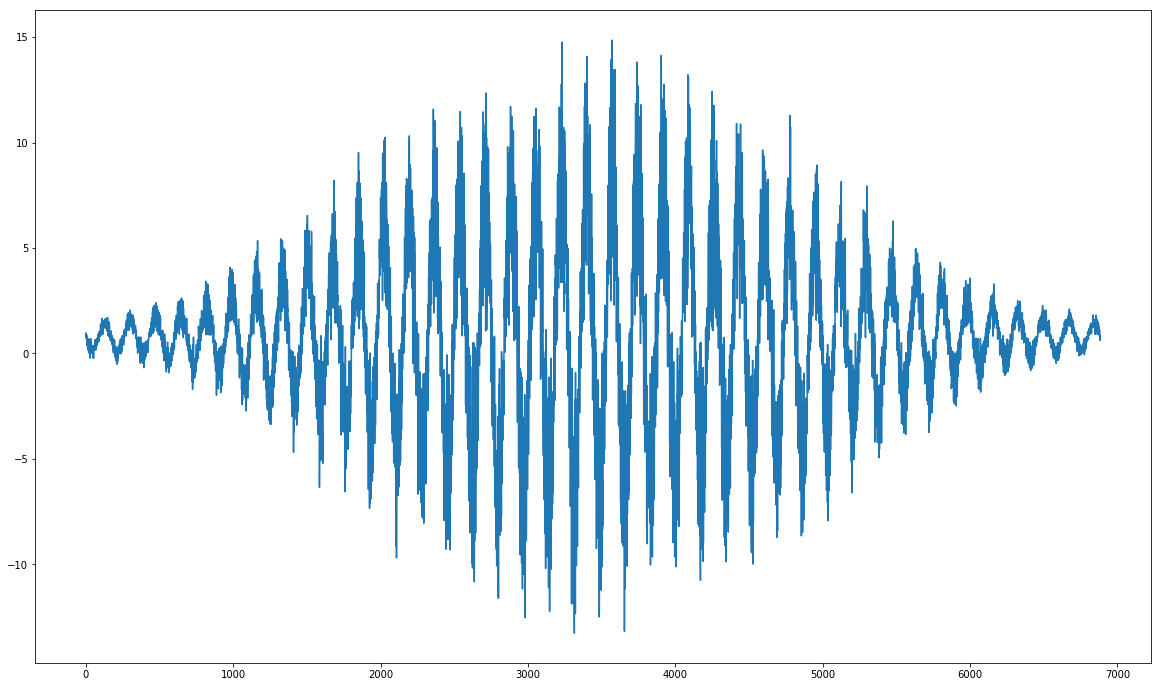

In [25]:
jdx = np.arange(int(N/2) + 1)

dl = np.array([
    np.sum(A * np.cos(2 * np.pi * jdx * i / N)) + np.sum(B * np.sin(2 * np.pi * jdx * i / N))
    for i in range(N)
])

plt.figure(figsize=(20, 12))
plt.plot(dl[1:])

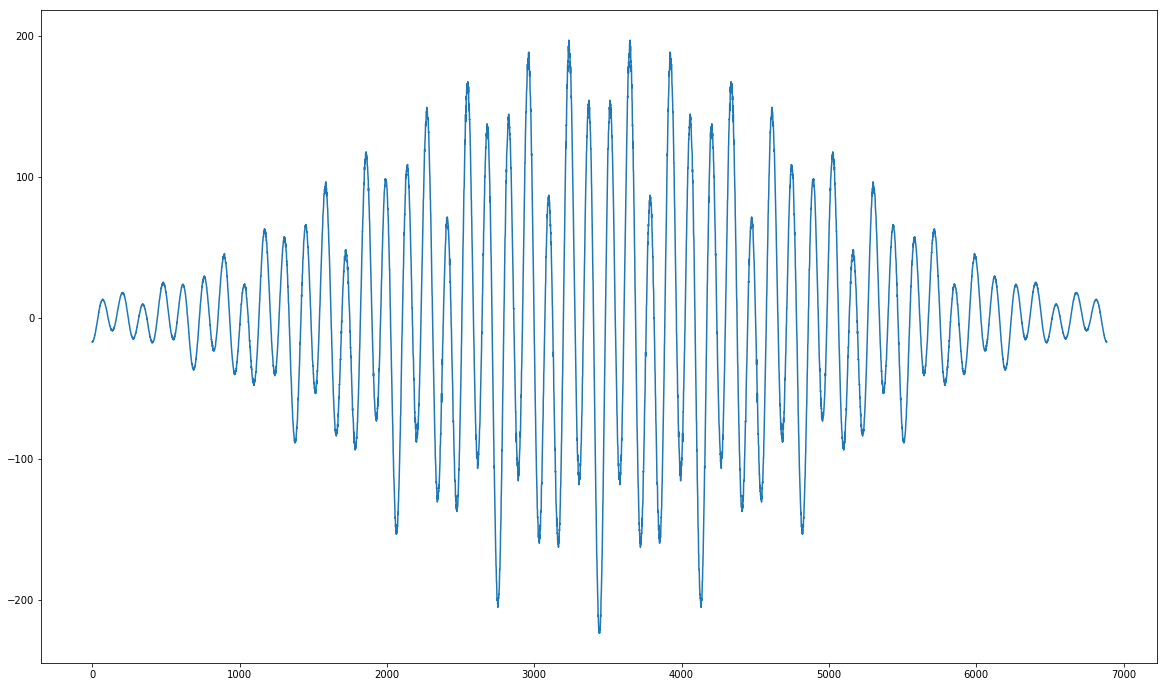

In [26]:
plt.figure(figsize=(20, 12))
plt.plot((dl - s1)[1:])

In [27]:
import scipy.signal

In [28]:
A, B, C = scipy.signal.stft(s1)